# Metodo de Runge Kutta  y Euler 2do Orden

Para obtener un mejor resultado en la integración es mejor utilizar la aproximación de segundo orden y con varias variables. Como vimos en clase:

$$ \vec y_{n+1} = \vec y_n + h \vec f+ \frac{1}{2}h^2 \left( \frac{\partial \vec f}{\partial x} + \mathbb{J} \vec f \right)$$

dónde $\vec f$ es $\vec f(x_n,\vec y_n)$, $\mathbb{J}$ es el jacobiano de $f$ en $(x_n,\vec y_n)$ y el orden de error es de $O(h²)$

In [6]:
from pylab import *
%matplotlib inline

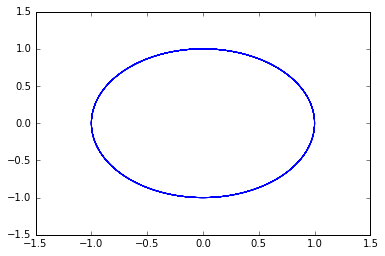

In [104]:
def integra2(ec,d_ec,p_ini,x,h = 0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac = d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])
def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])
t,y = integra2(prueba,d_prueba,[1,0],[0,50],0.001)
plot(y[:,0],y[:,1])
#plot(t,y[:,0],t,cos(t))

In [16]:
x = zeros((2,6))
print x
x[1,1]=3
x[0,1]=9
print "\n\n",x,"\n\n"
print x[:,1],"\n\n"
print x[1,:],"\n\n"
print type(x[1,:])

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


[[ 0.  9.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.]] 


[ 9.  3.] 


[ 0.  3.  0.  0.  0.  0.] 


<type 'numpy.ndarray'>


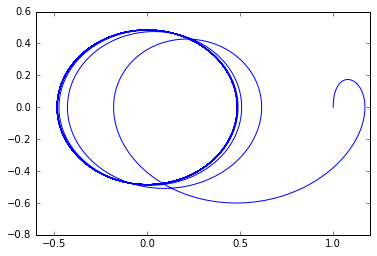

In [117]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+exp(-t)])

def p2(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])

def dp(y,t):
    return array([0,-exp(-t)]), array([[0,1],[-0.5*cos(y[0]),-2]])

def dp2(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

t,y = integra2(p2,dp2,[1,0],[0,100],0.001)
t2,y2 = integra2(p,dp,[1,0],[0,100],0.1)
#plot(t,y)
plot(y[:,0],y[:,1])
#plot(y2[:,0],y2[:,1])

In [ ]:
#jn1=yn+(h*f)+(0.5*h*h*(ja[0]+dot(jac[1],f)))

In [120]:
def rk2(ec,p_ini,x,h = 0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

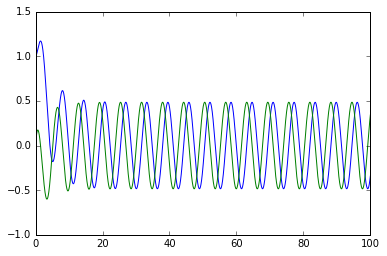

In [123]:
t,y = rk2(p2,[1,0],[0,100],0.001)
#t2,y2 = integra2(p,dp,[1,0],[0,100],0.1)
plot(t,y)
#plot(y[:,0],y[:,1])
#plot(y2[:,0],y2[:,1])

In [57]:
a = array([2,6])
b = [2,6]
print a,b
print 2*a , 2*b

[2 6] [2, 6]
[ 4 12] [2, 6, 2, 6]


In [58]:
A = array([[1,0],[0,1]])
A2= matrix([[3,0],[0,3]])
print "Impresión de Array: \n\n",A,"\n\nImpresión de matrix:\n\n",A2,"\n\nImpresión de la segunda entrada de la matriz A:\n\n",A[0,1],"\n\n"
print A*b,"\n\n", A*b,"\n\n"
print dot(A,b),"\n\n", dot(b,A2),"\n\n"
print "\n\nProdcuto de matrices con *:\n\n",A*A2,"\n\n"
print "\n\nProdcuto de matrices con dot:\n\n",dot(A2,A),"\n\n"

Impresión de Array: 

[[1 0]
 [0 1]] 

Impresión de matrix:

[[3 0]
 [0 3]] 

Impresión de la segunda entrada de la matriz A:

0 


[[2 0]
 [0 6]] 

[[2 0]
 [0 6]] 


[2 6] 

[[ 6 18]] 




Prodcuto de matrices con *:

[[3 0]
 [0 3]] 




Prodcuto de matrices con dot:

[[3 0]
 [0 3]] 




In [63]:
ASS = array([[1,2],[3,4]])
aa = array([6,7])
print "\n\nEntradas de la matriz:\n\n",ASS[0,0],ASS[0,1],ASS[1,0],ASS[1,1]
print "\n\n El prodcuto punto no funciona con *:\n\n",ASS*aa
print "\n\n pero sí con dot<x,y>:\n\n",dot(ASS,aa)



Entradas de la matriz:

1 2 3 4


 El prodcuto punto no funciona con *:

[[ 6 14]
 [18 28]]


 pero sí con dot<x,y>:

[20 46]
